In [27]:
# Importando bibliotecas que vão ser utilizadadas para a visualização dos dados para analisar a composição e correlação entre eles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Lendo o arquivo tratado e reduzido anteriormente
df = pd.read_csv('base-reduzida-v2.csv', sep=',', encoding='utf-8', index_col=0)

In [29]:
# Visualizando o cabeçalho e alguns dados do dicionário
df.head()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Dirigir Embriagado,...,Último Atendimento,Encaminhamento Acompanhamento,Compareceu Consulta,Limitação Atividade,Diagnóstico Bipolar,Visita Regular Doença,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento
57,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,NaN
59,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,NaN
61,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,NaN
65,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,2.0,4.0,1.0,NaN
94,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,1.0,4.0,1.0,NaN


In [30]:
# Verificando a quantidade de linhas e colunas do arquivo
df.shape

(14328, 26)

In [31]:
# Verificando informações relevantes das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14328 entries, 57 to 293718
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UF                             14328 non-null  int64  
 1   Diagnóstico Depressão          14328 non-null  float64
 2   Estado de Saúde                14328 non-null  float64
 3   Pouco Interesse                14328 non-null  float64
 4   Sentimento Depressivo          14328 non-null  float64
 5   Sentimento de Fracasso         14328 non-null  float64
 6   Ideação Suicida                14328 non-null  float64
 7   Consumo Álcool                 14328 non-null  float64
 8   Dias Álcool                    1568 non-null   float64
 9   Dirigir Embriagado             2198 non-null   float64
 10  Idade Diagnóstico              7584 non-null   float64
 11  Visita Regular                 4639 non-null   float64
 12  Motivo Não Visita              7584 non-null

In [32]:
# Verificando a correlação entre as colunas
df.corr()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Dirigir Embriagado,...,Último Atendimento,Encaminhamento Acompanhamento,Compareceu Consulta,Limitação Atividade,Diagnóstico Bipolar,Visita Regular Doença,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento
UF,1.000000,-0.058765,-0.002974,0.022701,0.018417,0.007584,-0.017223,0.103516,0.041744,0.008751,...,0.037087,-0.011454,-0.049585,-0.035582,-0.063244,0.034263,0.033148,-0.237964,-0.044098,-0.034297
Diagnóstico Depressão,-0.058765,1.000000,-0.773899,-0.509205,-0.590852,-0.454374,-0.272076,-0.241477,NaN,0.117939,...,0.000452,-0.019578,-0.037978,0.366044,0.018927,0.080019,-0.252451,0.031967,-0.668014,-0.019370
Estado de Saúde,-0.002974,-0.773899,1.000000,0.596232,0.665745,0.548386,0.381931,0.096517,-0.003184,-0.074503,...,-0.116024,0.056338,0.388684,-0.349217,-0.043859,-0.098444,0.198525,0.024661,0.796264,0.081199
Pouco Interesse,0.022701,-0.509205,0.596232,1.000000,0.711540,0.619287,0.435084,0.085533,0.027467,-0.084573,...,-0.036039,0.087570,0.435245,-0.315936,-0.054584,-0.099495,0.168189,0.013853,0.511484,0.100328
Sentimento Depressivo,0.018417,-0.590852,0.665745,0.711540,1.000000,0.744452,0.489904,0.099328,-0.031084,-0.056400,...,-0.046023,0.113297,0.451608,-0.342679,-0.048553,-0.083696,0.183029,0.013115,0.571914,0.102692
Sentimento de Fracasso,0.007584,-0.454374,0.548386,0.619287,0.744452,1.000000,0.545690,0.087961,0.028414,-0.062881,...,-0.055789,0.103017,0.435837,-0.317191,-0.065844,-0.084851,0.141514,0.029384,0.458479,0.117090
Ideação Suicida,-0.017223,-0.272076,0.381931,0.435084,0.489904,0.545690,1.000000,0.034670,0.035511,-0.000300,...,-0.070322,0.077860,0.369308,-0.214920,-0.053731,-0.074935,0.078308,0.023897,0.325578,0.095369
Consumo Álcool,0.103516,-0.241477,0.096517,0.085533,0.099328,0.087961,0.034670,1.000000,NaN,-0.169538,...,0.112686,0.054773,-0.098026,-0.128700,0.015719,0.035948,-0.039519,-0.068529,0.010177,0.004598
Dias Álcool,0.041744,NaN,-0.003184,0.027467,-0.031084,0.028414,0.035511,NaN,1.000000,-0.138900,...,0.053427,0.015698,0.050545,0.036794,-0.044586,0.066409,-0.212828,-0.045958,0.000291,0.073768
Dirigir Embriagado,0.008751,0.117939,-0.074503,-0.084573,-0.056400,-0.062881,-0.000300,-0.169538,-0.138900,1.000000,...,-0.054302,-0.050203,-0.055997,0.049865,0.018682,0.045052,0.095165,-0.004662,-0.035032,0.048842


[]

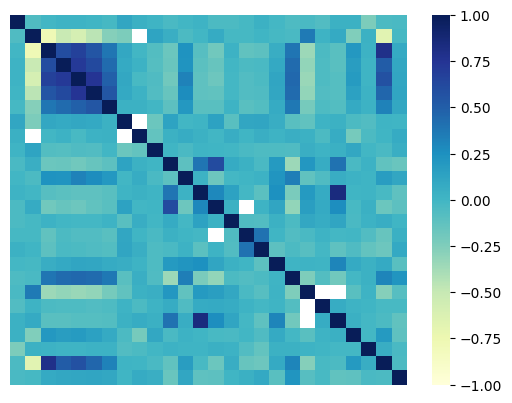

In [33]:
# Verificando como é a correlação das colunas do dataframe através de um heatmap
fig, ax = plt.subplots()
sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=False, cmap='YlGnBu', linewidths=0, ax=ax)
ax.set_xticks([])
ax.set_yticks([])

In [34]:
# Verificando valores ausentes (NaN) nas variáveis, com exceção dos atributos: 'PassengerId' e 'Name'

print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()), "->", df[col].isnull().sum())

Valores ausentes (NaN) em:
UF : False -> 0
Diagnóstico Depressão : False -> 0
Estado de Saúde : False -> 0
Pouco Interesse : False -> 0
Sentimento Depressivo : False -> 0
Sentimento de Fracasso : False -> 0
Ideação Suicida : False -> 0
Consumo Álcool : False -> 0
Dias Álcool : True -> 12760
Dirigir Embriagado : True -> 12130
Idade Diagnóstico : True -> 6744
Visita Regular : True -> 9689
Motivo Não Visita : True -> 6744
Psicoterapia : True -> 6744
Medicamentos : True -> 6744
Terapias Complementares : True -> 10026
Último Atendimento : True -> 9268
Encaminhamento Acompanhamento : True -> 12429
Compareceu Consulta : True -> 6744
Limitação Atividade : False -> 0
Diagnóstico Bipolar : True -> 12040
Visita Regular Doença : True -> 12040
Sexo : False -> 0
Cor Raça : False -> 0
Estado de Saúde Geral : False -> 0
Motivo Impedimento : True -> 12353


In [35]:
# variáveis e tipo
df.dtypes

UF                                 int64
Diagnóstico Depressão            float64
Estado de Saúde                  float64
Pouco Interesse                  float64
Sentimento Depressivo            float64
Sentimento de Fracasso           float64
Ideação Suicida                  float64
Consumo Álcool                   float64
Dias Álcool                      float64
Dirigir Embriagado               float64
Idade Diagnóstico                float64
Visita Regular                   float64
Motivo Não Visita                float64
Psicoterapia                     float64
Medicamentos                     float64
Terapias Complementares          float64
Último Atendimento               float64
Encaminhamento Acompanhamento    float64
Compareceu Consulta              float64
Limitação Atividade              float64
Diagnóstico Bipolar              float64
Visita Regular Doença            float64
Sexo                             float64
Cor Raça                         float64
Estado de Saúde 

In [36]:
# média, mediana, máximo e mínimo, utilizado para calcular uma estatística descritiva das colunas 
df.describe()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Dirigir Embriagado,...,Último Atendimento,Encaminhamento Acompanhamento,Compareceu Consulta,Limitação Atividade,Diagnóstico Bipolar,Visita Regular Doença,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento
count,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,1568.000000,2198.000000,...,5060.000000,1899.000000,7584.000000,14328.000000,2288.000000,2288.000000,14328.000000,14328.000000,14328.000000,1975.000000
mean,32.459799,1.472990,1.846036,1.589336,1.632468,1.416039,1.164922,1.371371,1.767857,1.879436,...,4.435375,1.451817,1.884230,1.840313,1.921766,1.709353,1.659548,2.457705,2.049902,6.321013
std,11.459242,0.499287,1.035705,0.952624,1.014124,0.867465,0.567081,0.672576,1.706906,0.325694,...,1.978330,0.749549,1.169999,0.366329,0.268599,0.454160,0.473878,1.439319,1.004121,4.846398
min,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,5.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000
75%,42.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,12.000000
max,53.000000,2.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,7.000000,2.000000,...,9.000000,3.000000,5.000000,2.000000,2.000000,2.000000,2.000000,9.000000,5.000000,14.000000


In [37]:
# proporção entre classes exemplo, conta a quantidade de frequência dos dados
counts = df['UF'].value_counts()
counts 

35    1227
31    1171
43     923
41     914
33     849
42     847
32     713
23     559
50     540
52     521
26     520
53     482
25     443
24     431
29     415
21     413
51     412
27     373
13     369
15     368
28     350
22     338
11     308
12     292
17     218
14     210
16     122
Name: UF, dtype: int64

In [38]:
# Pessoas que tiveram diagnóstico de depressão: 1.0, Pessoas que não tiveram: 2.0, Ignorado: 3.0
counts = df['Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?'].value_counts()
counts

KeyError: 'Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?'

In [ ]:
# Utilizado para ver a quantidade de dados distribuídos e mostrar os que estão em outlier  
sns.boxplot(data=df['Quantos dias por semana o(a) Sr(a) costuma consumir alguma bebida alcoólica? '])

KeyError: 'Quantos dias por semana o(a) Sr(a) costuma consumir alguma bebida alcoólica? '

<AxesSubplot: >

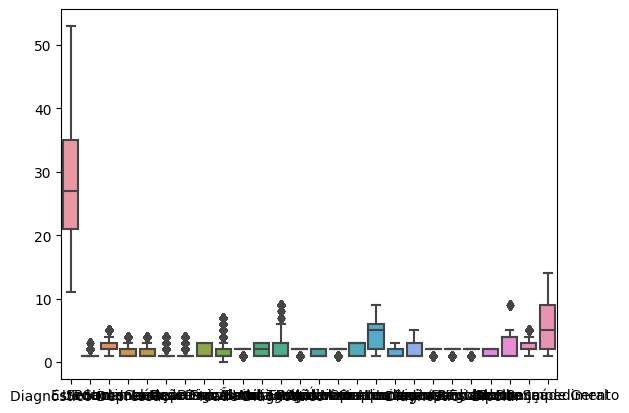

In [ ]:
# Todos os outliers da base
sns.boxplot(data=df)